In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
sns.set()
get_ipython().magic('matplotlib inline')
import sklearn # for scientific calculations
from sklearn import preprocessing
from matplotlib import rcParams
from seaborn import distplot
import warnings
warnings.filterwarnings("ignore")
import pickle
from flask import Flask, request, render_template

# preprocessing

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC



In [2]:
data = pd.read_csv("C:\\Users\\SIMRAN\\Desktop\cardiovascular.csv", sep=";")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data.shape

(70000, 13)

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# Rename columns to make features more clearly understood
data.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'target'}, inplace=True)

In [8]:
data.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
data = data.drop('id', axis=1)

In [10]:
data.head()


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# 24 Duplicated entries
print(f'{data.duplicated().sum()} duplicates recorded.')

24 duplicates recorded.


In [12]:
data[data.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.count()

age            69976
gender         69976
height         69976
weight         69976
systolic       69976
diastolic      69976
cholesterol    69976
glucose        69976
smoke          69976
alcohol        69976
active         69976
target         69976
dtype: int64

In [15]:
print(f'{data.dtypes.value_counts()}')

int64      11
float64     1
dtype: int64


In [16]:
data.shape

(69976, 12)

In [17]:
print('Let us now get a quick summary of features available.')
data.describe().T.round(2)

Let us now get a quick summary of features available.


,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.95,2467.37,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.35,0.48,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.36,8.21,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.21,14.40,10.0,65.0,72.0,82.0,200.0
systolic,69976.0,128.82,154.04,-150.0,120.0,120.0,140.0,16020.0
diastolic,69976.0,96.64,188.50,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.37,0.68,1.0,1.0,1.0,2.0,3.0
glucose,69976.0,1.23,0.57,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.09,0.28,0.0,0.0,0.0,0.0,1.0
alcohol,69976.0,0.05,0.23,0.0,0.0,0.0,0.0,1.0


In [18]:
# Convert the ages from number of days to categorical values
def calculate_age(days):
  days_year = 365.2425
  age = int(days // days_year)
  return age

In [19]:
def categorize_age(age):
  if 0 < age <= 2:
    return "Infants"
  elif 2 < age <= 5:
    return "Pre School Child"
  elif 5 < age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Adolescent"
  elif 19 < age <= 24:
    return "Young Adult"
  elif 24 < age <= 44:
    return "Adult"
  elif 44 < age <= 65:
    return "Middle Aged"
  elif 65 < age:
    return "Aged"

In [20]:
def categorize_age_tees(age):
  if 0 < age <= 10:
    return "10s"
  elif 10 < age <= 30:
    return "20s"
  elif 20 < age <= 30:
    return "30s"
  elif 30 < age <= 40:
    return "40s"
  elif 40 < age <= 50:
    return "50s"
  elif 50 < age <= 60:
    return "60s"
  elif 60 < age <= 70:
    return "70+"


In [21]:
# age transformations
data['age'] = data['age'].apply(lambda x: calculate_age(x))
data['age_cat'] = data['age'].apply(lambda x: categorize_age(x))
data['age_tees'] = data['age'].apply(lambda x: categorize_age_tees(x))
data.head()


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Middle Aged,50s
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Middle Aged,60s
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Middle Aged,50s
4,47,1,156,56.0,100,60,1,1,0,0,0,0,Middle Aged,50s


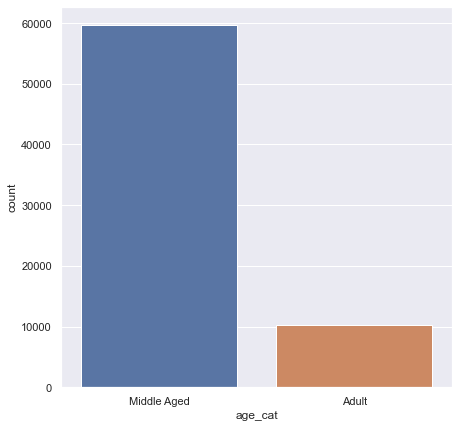

In [22]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', data = data) 

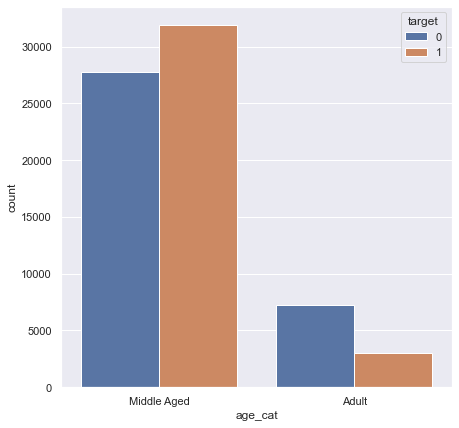

In [23]:
# Visulization of age groups with cvd info
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', hue = 'target', data = data) 

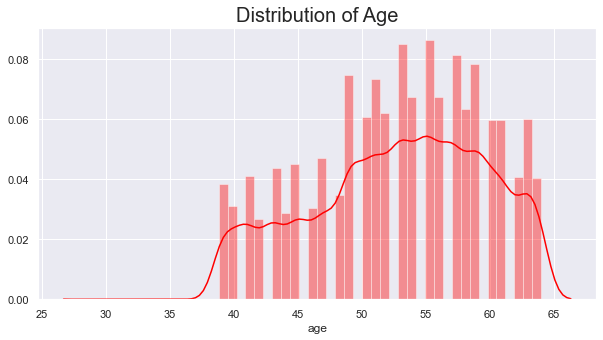

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(data['age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

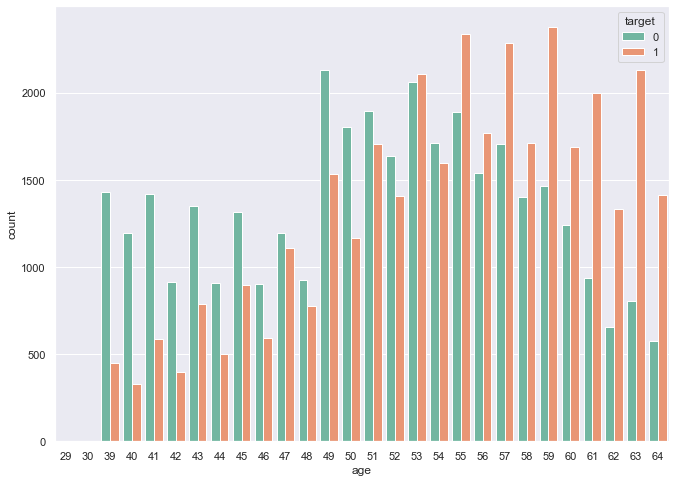

In [25]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='target', data = data, palette="Set2");

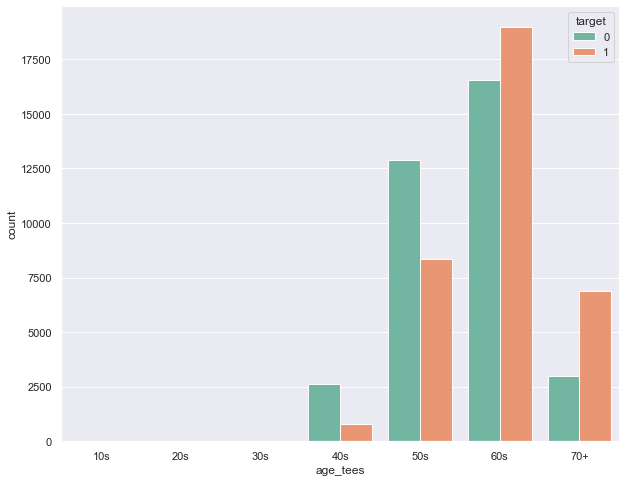

In [26]:
rcParams['figure.figsize'] = 10, 8
sns.countplot(x='age_tees', hue='target', data = data, palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+']);

In [27]:
# Height comparison 
data.groupby('gender')['height'].mean()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64

In [28]:
# Alcohol consumption 
data.groupby('gender')['alcohol'].sum()

gender
1    1161
2    2603
Name: alcohol, dtype: int64

In [29]:
# Gender Ratio
data['gender'].value_counts()

1    45509
2    24467
Name: gender, dtype: int64

In [30]:
# Calcualte the CVD distribution based on Gender
data['target'].value_counts(normalize=True)

0    0.500229
1    0.499771
Name: target, dtype: float64

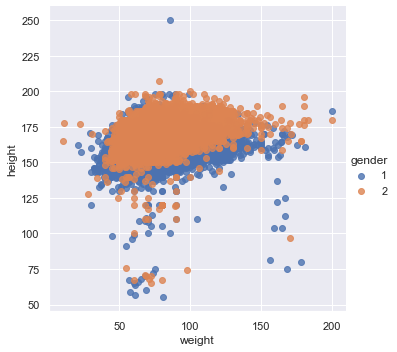

In [31]:
sns.lmplot(x="weight",y="height",hue="gender", data=data, fit_reg=False)
plt.show()

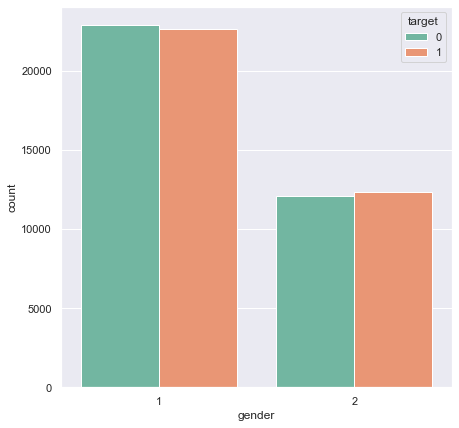

In [32]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='gender', hue='target', data = data, palette="Set2");

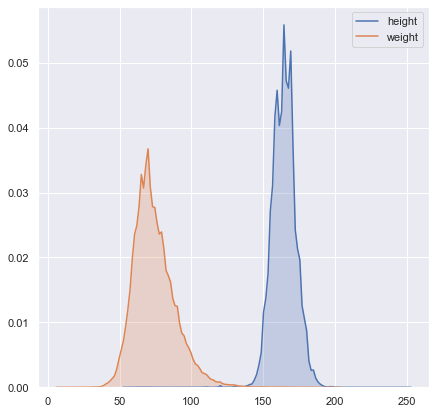

In [33]:
for col in ["height", "weight"]:
    sns.kdeplot(data[col], shade=True)
    

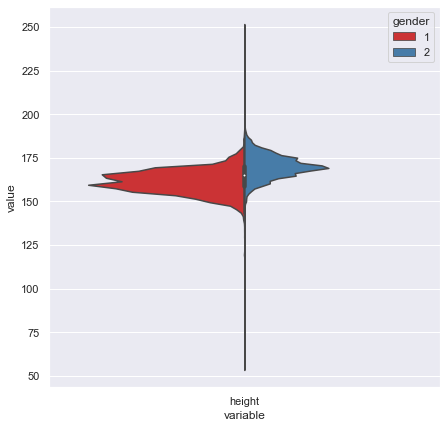

In [34]:
# Height Distribution
data_melt = pd.melt(frame=data, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=data_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

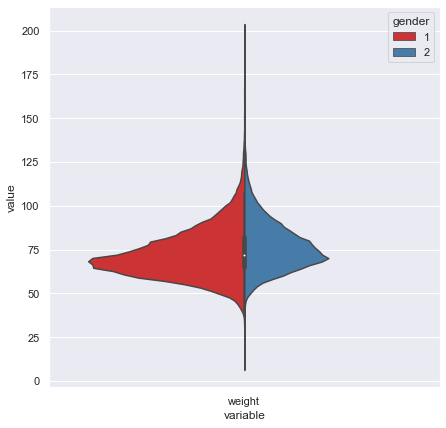

In [35]:
# Weight Distribution
data_melt = pd.melt(frame=data, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=data_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

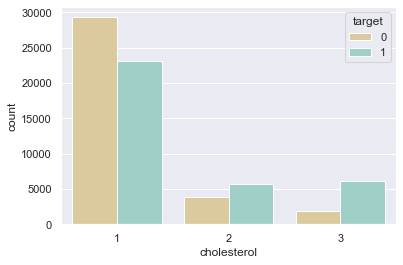

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='target', data=data,palette="BrBG")
plt.show()
# There appears to be a correlation between higher cholesterol levels and cardiovascular disease
# chloesterol levels: 1 = normal, 2 = above normal, 3 = well above normal


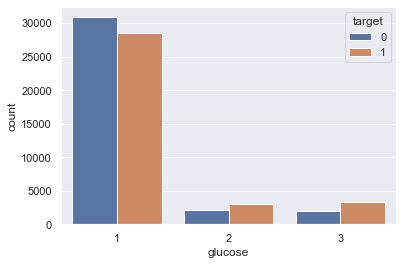

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='glucose', hue='target', data=data)
plt.show()
# There appears to be another correlation between higher glucose levels and cardiovascular disease
# glucose levels: 1 = normal, 2 = above normal, 3 = well above normal


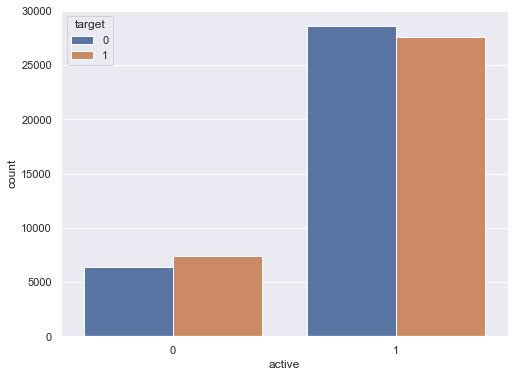

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='active', hue='target', data=data)
plt.show()


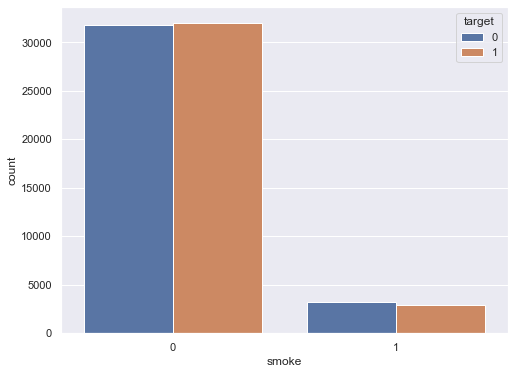

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoke', hue='target', data=data)
plt.show()

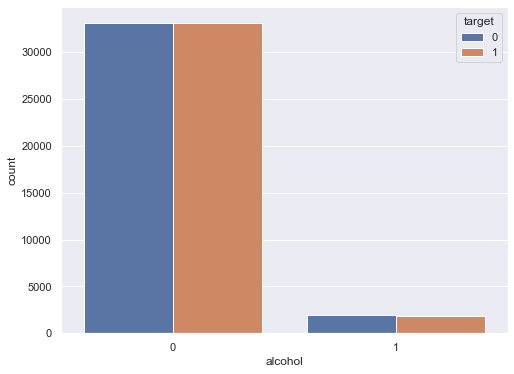

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='alcohol', hue='target', data=data)
plt.show()

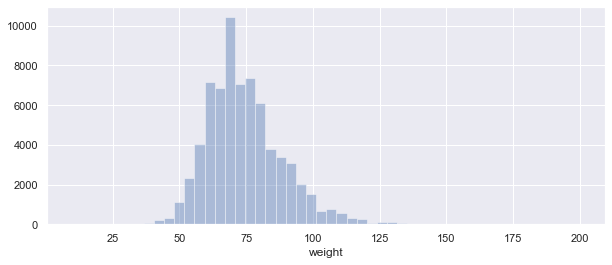

In [41]:
plt.figure(figsize=(10,4))
sns.distplot(data['weight'], kde=False)
plt.show()

In [42]:
data['weight'].sort_values().head()

57858    10.0
33817    11.0
60188    21.0
29488    22.0
26806    23.0
Name: weight, dtype: float64

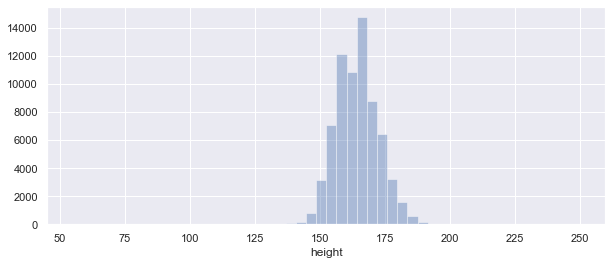

In [43]:
plt.figure(figsize=(10,4))
sns.distplot(data['height'], kde=False)
plt.show()

In [44]:
data['height'].max()
#This maximum height of 250 cm/8.2 ft seems unlikely

250

In [45]:
data['height'].sort_values().head()
#The minimum height of 55 cm/1.8 ft also seems unlikely and unrealistic.
#This dataset may not be legitimate; however, we will continue on with the data analysis and model selection.

22723    55
66643    57
64115    59
29157    60
27603    64
Name: height, dtype: int64

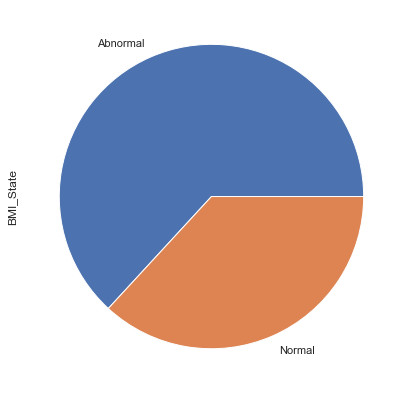

In [46]:
# calculate the BMI score 
data['BMI'] = data['weight']/((data['height']/100)**2)
data['pulse pressure'] = data['systolic'] - data['diastolic']


# categorize normal & abnormal
def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

data["BMI_State"] = data["BMI"].apply(lambda x: bmi_categorize(x))
data["BMI_State"].value_counts().plot(kind='pie')

In [47]:
data.head()
# Quick look at the dataframe to make sure these new features have been added

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Middle Aged,50s,21.967120,30,Normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Middle Aged,60s,34.927679,50,Abnormal
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,60,Normal
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Middle Aged,50s,28.710479,50,Abnormal
4,47,1,156,56.0,100,60,1,1,0,0,0,0,Middle Aged,50s,23.011177,40,Normal


In [48]:
data[data['BMI'] > 100].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
6153,57,1,122,161.0,120,80,1,1,0,0,1,1,Middle Aged,60s,108.169847,40,Abnormal
7598,40,2,70,72.0,120,8,1,1,0,0,1,0,Adult,40s,146.938776,112,Abnormal
8171,48,2,97,170.0,160,100,1,1,1,0,1,1,Middle Aged,50s,180.678074,60,Abnormal
12770,53,1,75,168.0,120,80,1,1,1,0,1,1,Middle Aged,60s,298.666667,40,Abnormal
13265,61,2,71,68.0,120,80,3,1,0,0,1,0,Middle Aged,70+,134.893870,40,Abnormal
14323,60,1,67,57.0,120,90,1,1,0,0,1,1,Middle Aged,60s,126.977055,30,Abnormal
15167,43,1,70,68.0,120,80,1,1,0,0,0,0,Adult,50s,138.775510,40,Abnormal
15366,47,1,125,167.0,180,90,1,2,0,0,1,1,Middle Aged,50s,106.880000,90,Abnormal
16699,53,2,74,98.0,140,90,1,1,0,0,1,1,Middle Aged,60s,178.962747,50,Abnormal
20028,54,1,112,167.0,180,120,1,1,0,1,1,0,Middle Aged,60s,133.131378,60,Abnormal


In [49]:
data[(data['pulse pressure'] >= 60 ) & (data['cholesterol'] == 3)].head(15)


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,60,Normal
24,45,1,170,68.0,150,90,3,1,0,0,1,1,Middle Aged,50s,23.529412,60,Normal
44,54,1,154,50.0,170,80,3,1,0,0,1,1,Middle Aged,60s,21.082813,90,Normal
61,57,2,165,75.0,180,90,3,1,0,0,1,1,Middle Aged,60s,27.548209,90,Abnormal
194,60,1,162,62.0,140,80,3,1,0,0,1,1,Middle Aged,60s,23.624447,60,Normal
221,48,1,157,70.0,160,100,3,1,0,0,0,1,Middle Aged,50s,28.398718,60,Abnormal
230,64,2,175,75.0,180,100,3,1,1,1,1,1,Middle Aged,70+,24.489796,80,Normal
275,53,1,157,80.0,150,90,3,1,0,0,1,1,Middle Aged,60s,32.455678,60,Abnormal
280,55,1,152,72.0,160,90,3,1,0,0,1,1,Middle Aged,60s,31.163435,70,Abnormal
299,63,2,173,85.0,140,80,3,1,0,0,1,1,Middle Aged,70+,28.400548,60,Abnormal


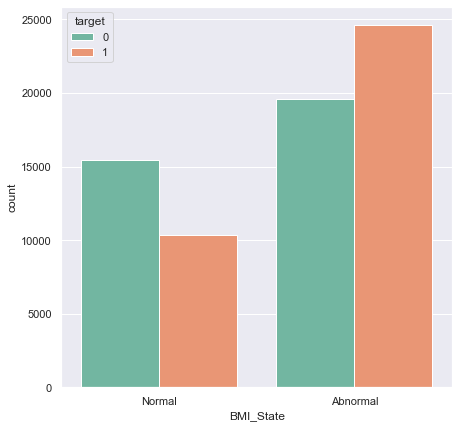

In [50]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='BMI_State', hue='target', data = data, palette="Set2");

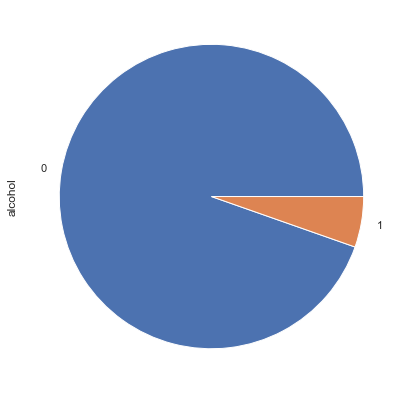

In [51]:
# Alcohol consumption 
data["alcohol"].value_counts().plot(kind='pie')

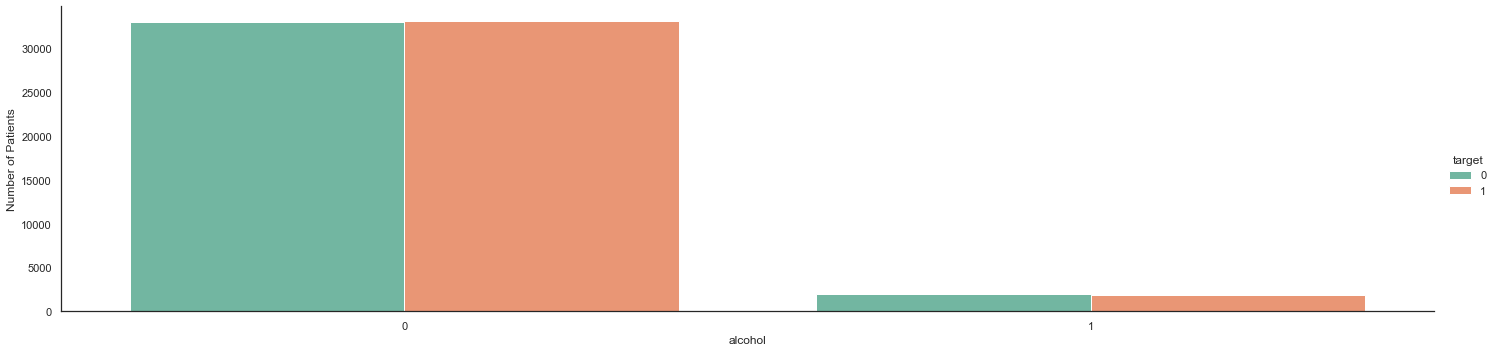

In [52]:
with sns.axes_style('white'):
    g = sns.factorplot("alcohol", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

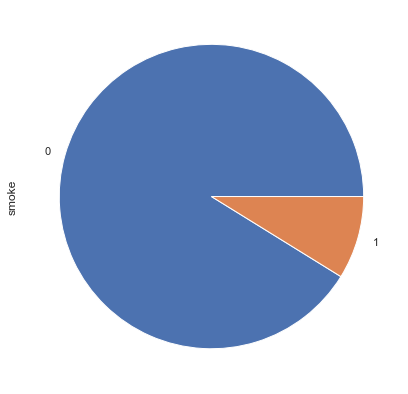

In [53]:
data["smoke"].value_counts().plot(kind='pie')

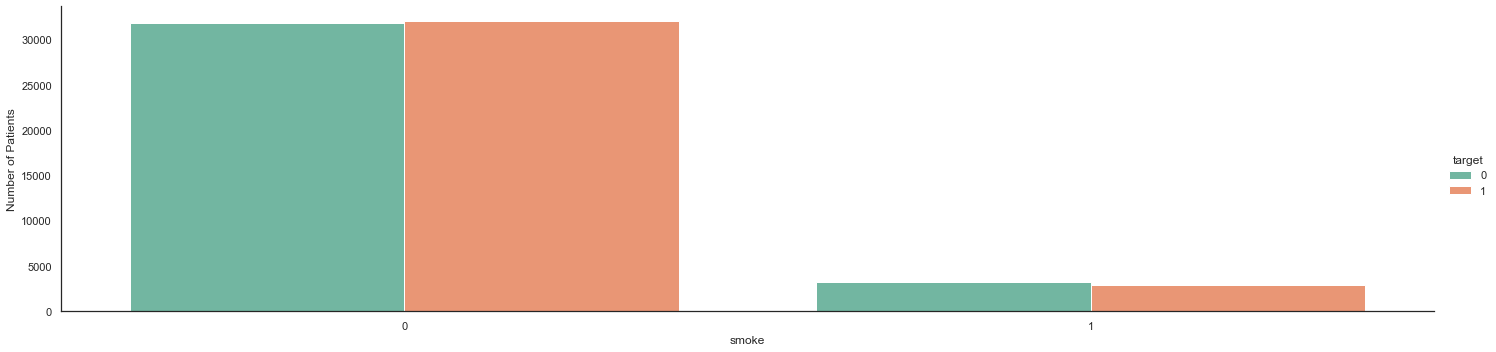

In [54]:
with sns.axes_style('white'):
    g = sns.factorplot("smoke", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

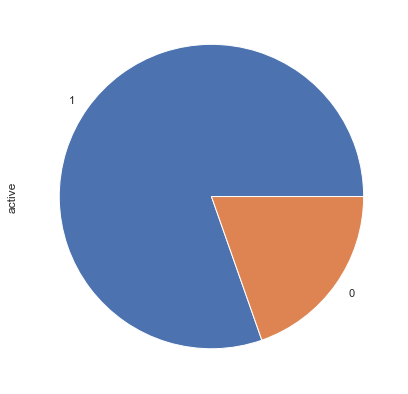

In [55]:
data["active"].value_counts().plot(kind='pie')

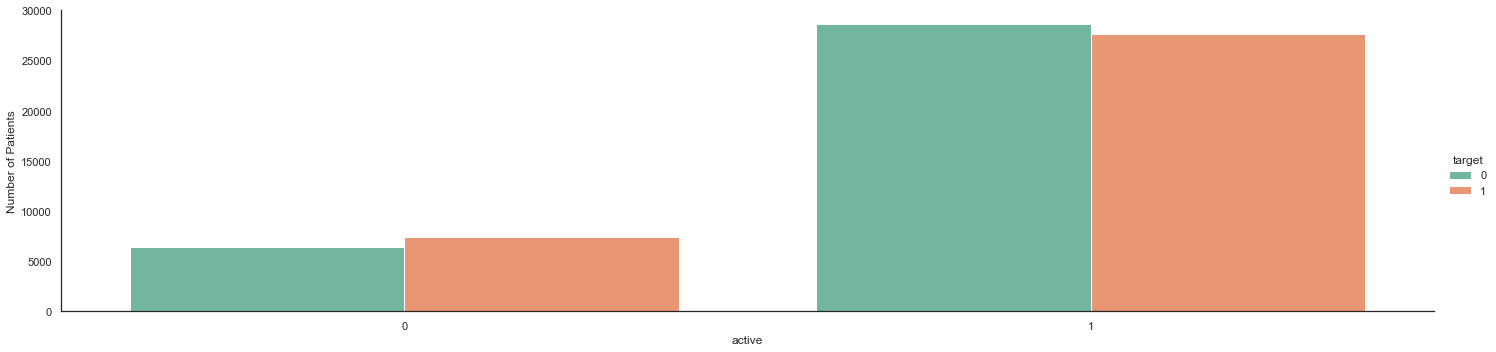

In [56]:
with sns.axes_style('white'):
    g = sns.factorplot("active", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

<Figure size 288x216 with 0 Axes>

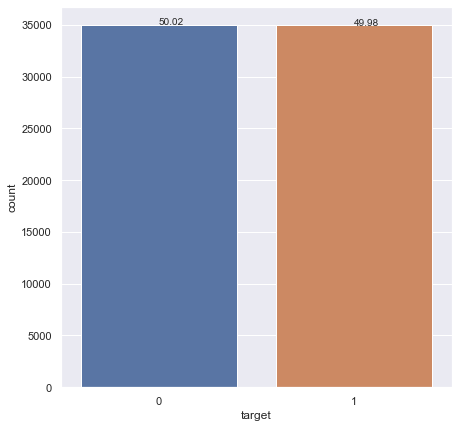

In [57]:
# Let us first have a look at our target variable.
plt.figure(figsize=(4,3))
fig, ax = plt.subplots(1,1)
sns.countplot(data['target'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}'.format((i.get_height()/len(data['target']))*100,'%'))
plt.show()

No handles with labels found to put in legend.


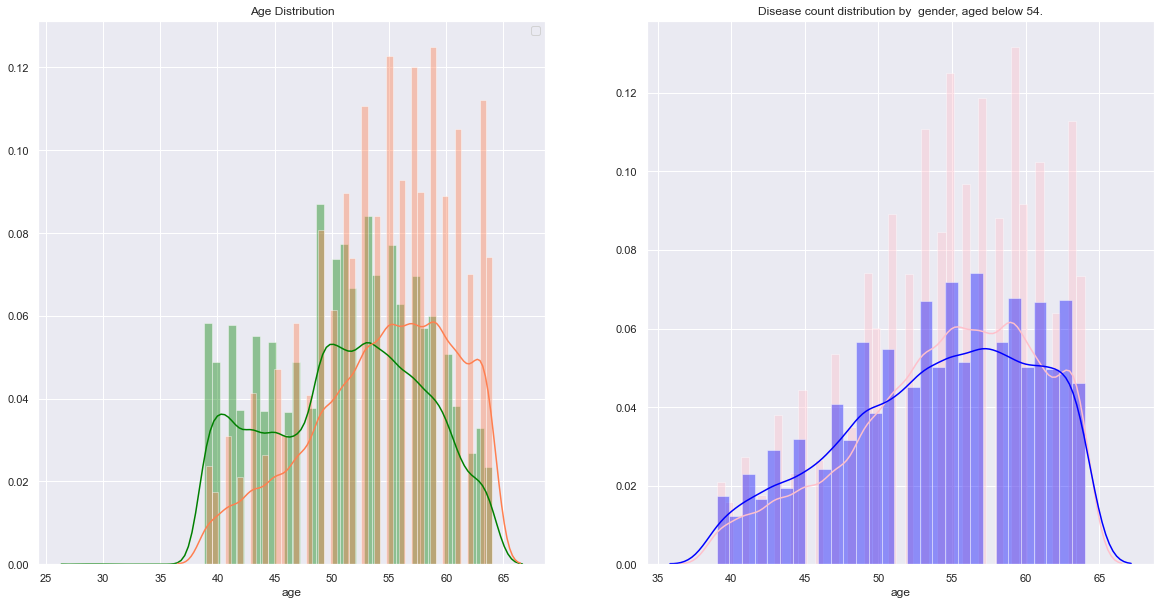

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data['age'][data['target']==0], ax = ax1, color='green')
sns.distplot(data['age'][data['target']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend()

sns.distplot(data['age'][(data['gender']==1) & (data['target']==1)],ax = ax2,color='pink')
sns.distplot(data['age'][(data['gender']==2) & (data['target']==1)],ax = ax2,color='blue')
ax2.set_title('Disease count distribution by  gender, aged below 54.')
plt.show()

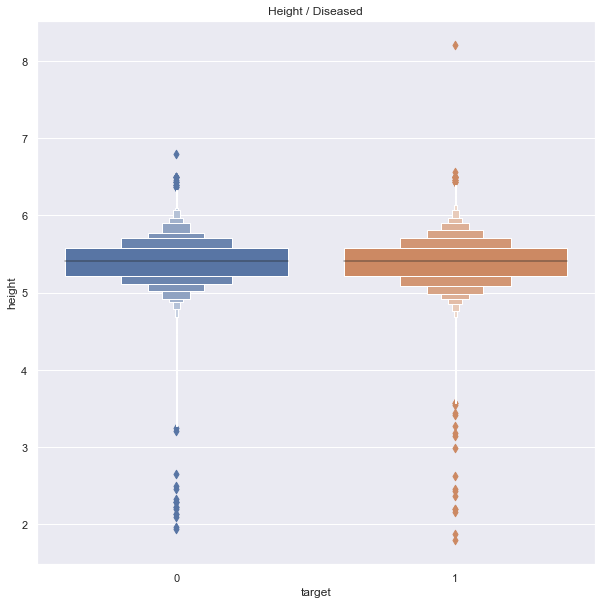

In [59]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(data['target'],(data['height']*0.0328084),ax=ax1)
ax1.set_title('Height / Diseased')
plt.show()

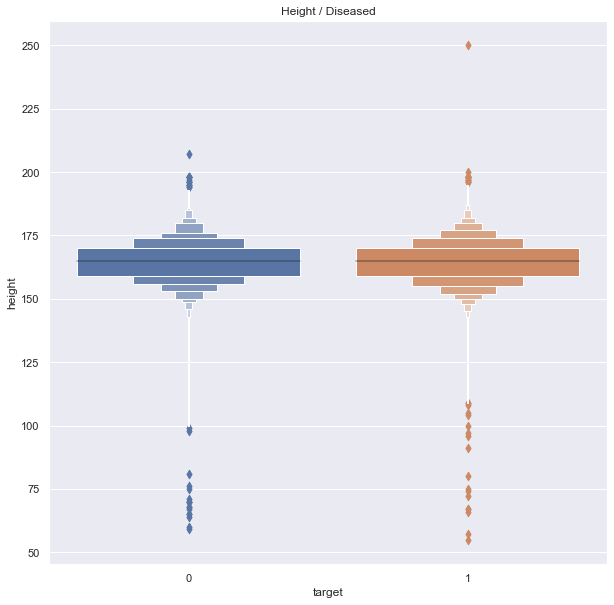

In [60]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(data['target'],(data['height']),ax=ax1)
ax1.set_title('Height / Diseased')
plt.show()

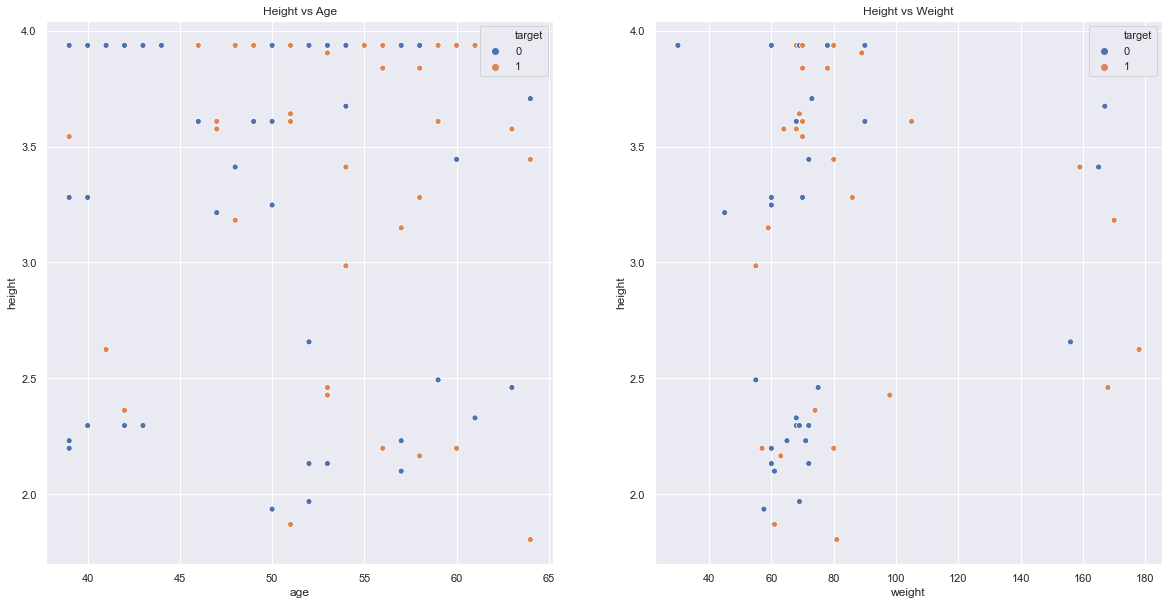

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(data['age'],data['height'][(data['height']*0.0328084)<4]*0.0328084,hue=data['target'],ax=ax1)
ax1.set_title('Height vs Age')
sns.scatterplot(data['weight'],data['height'][(data['height']*0.0328084)<4]*0.0328084,hue=data['target'],ax=ax2)
ax2.set_title('Height vs Weight')
plt.show()


In [62]:
#Converting height in cms to foot.
data['height'] = data['height']*0.0328084 
filt =(data['height']>8) | (data['height']<3) 

data.drop(index = list(data[filt].index),inplace=True)
print(f'Dataset: {data.shape}')


Dataset: (69950, 17)


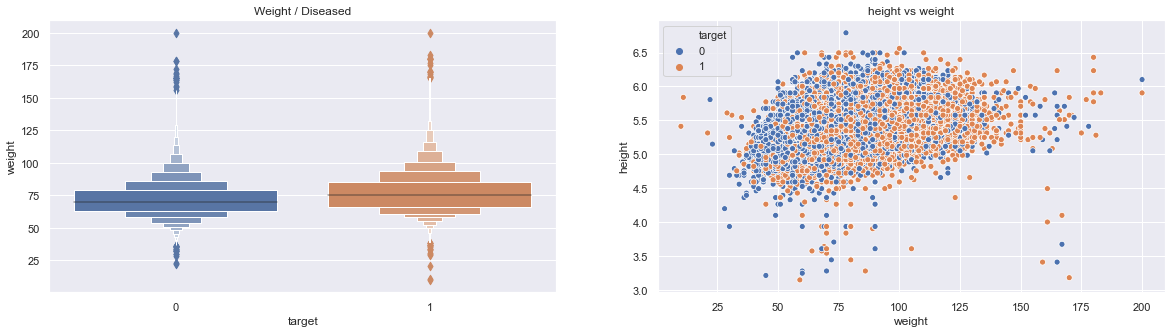

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxenplot(data['target'],(data['weight']),ax=ax1)
ax1.set_title('Weight / Diseased')
sns.scatterplot(data['weight'],data['height'],ax=ax2,hue=data['target'])
ax2.set_title('height vs weight')
plt.show()


In [64]:
# 1. Weight < 25 kg
filt1 = data['weight']<25
data.drop(index=list(data[filt1].index),inplace=True)

# 2. Weight > 175 kg
filt2 = data['weight']>175
data.drop(index=list(data[filt2].index),inplace=True)

# 3. Height < 4.5 & Weight > 150 kg
filt3 = (data['height']<4.5) & (data['weight']>150)
data.drop(index=list(data[filt3].index),inplace=True)


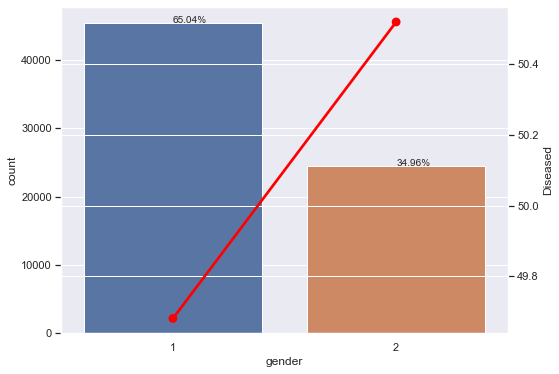

In [65]:
# Gender
fig,(ax) = plt.subplots(1,1, figsize=(8,6))
tmp = pd.crosstab(data['gender'],data['target'],normalize='index').round(4)*100
tmp.columns = ['Not Diseased','Diseased']
ax1 = sns.countplot(data['gender'])
ax2 = ax1.twinx()
sns.pointplot(tmp.index,tmp['Diseased'],ax=ax2, color='red')
for x in ax1.patches:
    height = x.get_height()
    ax1.text(x.get_x()+x.get_width()/2,height,'{:.2f}{}'.format((height/len(data))*100,'%'))
plt.show()

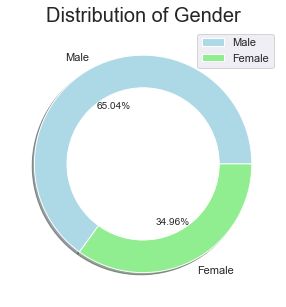

In [66]:
size = data['gender'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"


my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size,colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()


In [67]:
# systolic
filt = (data['systolic']<90) | (data['systolic']>140)
print(f'Normal systolic blood pressure range is between 90 and 120. However, from our dataset we can see that we have {len(data[filt])} records that are not falling within the normal range. We can replace them with their median values.')


Normal systolic blood pressure range is between 90 and 120. However, from our dataset we can see that we have 10206 records that are not falling within the normal range. We can replace them with their median values.


In [68]:
data['systolic'].replace(data[filt]['systolic'].values,data['systolic'].median(),inplace=True)

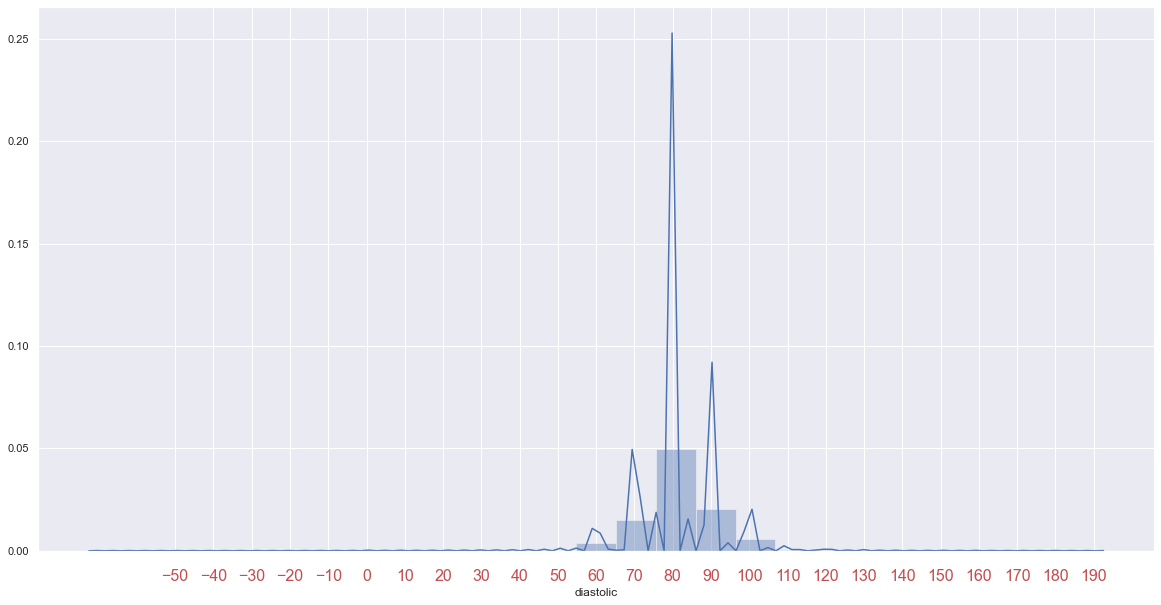

Similar to Systolic Blood Pressure Range the diastolic bp range should be between 60-90 for a healthy individual. However, in this case we have median values for diastolic as 80.0 which does not look correct to me. Considering this in mind we would have to do some further analysis if the data source is correct or not.


In [69]:
# filt =  (data['ap_lo']>90) | (data['ap_lo']<60)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.distplot(data['diastolic'][data['diastolic']<200],bins = 25, kde = True, ax = ax)
xticks = [i*10 for i in range(-5,20)]
ax.set_xticks(xticks)
ax.tick_params(axis='x',labelsize = 16, pad = 12,  
               colors ='r')
plt.show()
print(f'Similar to Systolic Blood Pressure Range the diastolic bp range should be between 60-90 for a healthy individual. However, in this case we have median values for diastolic as {data.diastolic.median()} which does not look correct to me. Considering this in mind we would have to do some further analysis if the data source is correct or not.')

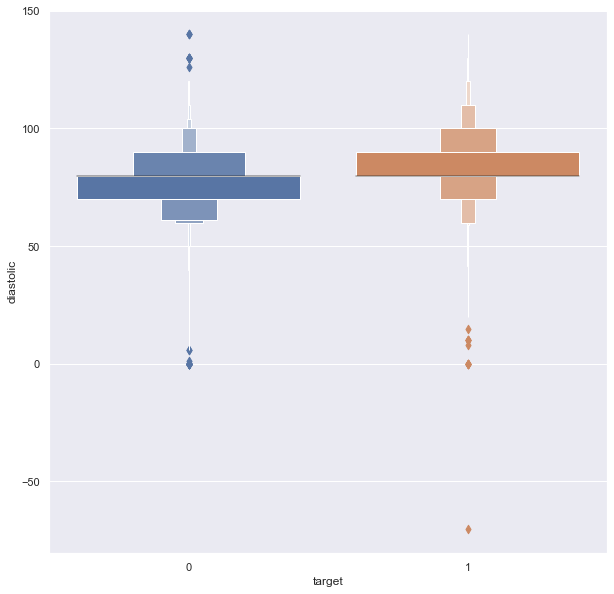

In [70]:
plt.figure(figsize=(10,10))
sns.boxenplot(data['target'],data['diastolic'][data['diastolic']<150])
plt.show()

In [71]:
data.tail(5)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State
69995,52,2,5.511811,76.0,120,80,1,1,1,0,1,0,Middle Aged,60s,26.927438,40,Abnormal
69996,61,1,5.183727,126.0,140,90,2,2,0,0,1,1,Middle Aged,70+,50.472681,50,Abnormal
69997,52,2,6.003937,105.0,120,90,3,1,0,1,0,1,Middle Aged,60s,31.353579,90,Abnormal
69998,61,1,5.347769,72.0,135,80,1,2,0,0,0,1,Middle Aged,70+,27.099251,55,Abnormal
69999,56,1,5.577428,72.0,120,80,2,1,0,0,1,0,Middle Aged,60s,24.913495,40,Normal


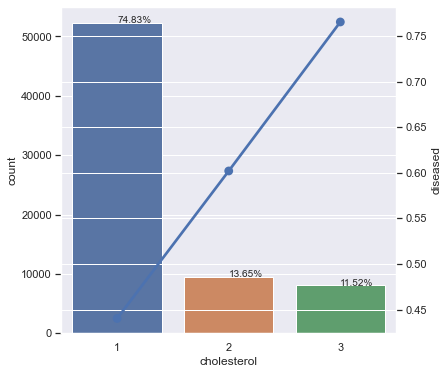

In [72]:
# cholesterol
tmp = pd.crosstab(data['cholesterol'],data['target'],normalize='index')
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1, figsize=(6,6))
sns.countplot(data['cholesterol'], ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['cholesterol'])*100,'%'))
plt.show()

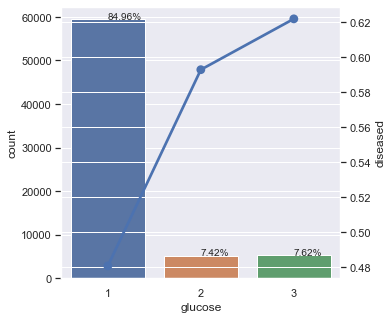

In [73]:
# Glucose
tmp = pd.crosstab(data['glucose'],data['target'],normalize='index')
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1)
sns.countplot(data['glucose'], ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['glucose'])*100,'%'))
plt.show()

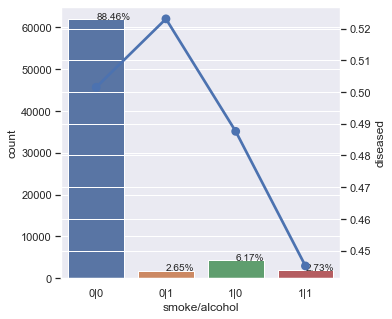

In [74]:
data['smoke/alcohol'] = data['smoke'].apply(str)+'|'+data['alcohol'].apply(str)

tmp = pd.crosstab(data['smoke/alcohol'],data['target'],normalize='index')
tmp.columns = ['Not diseased','diseased']

fig, ax = plt.subplots(1,1)
sns.countplot(data['smoke/alcohol'], ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['smoke/alcohol'])*100,'%'))
plt.show()

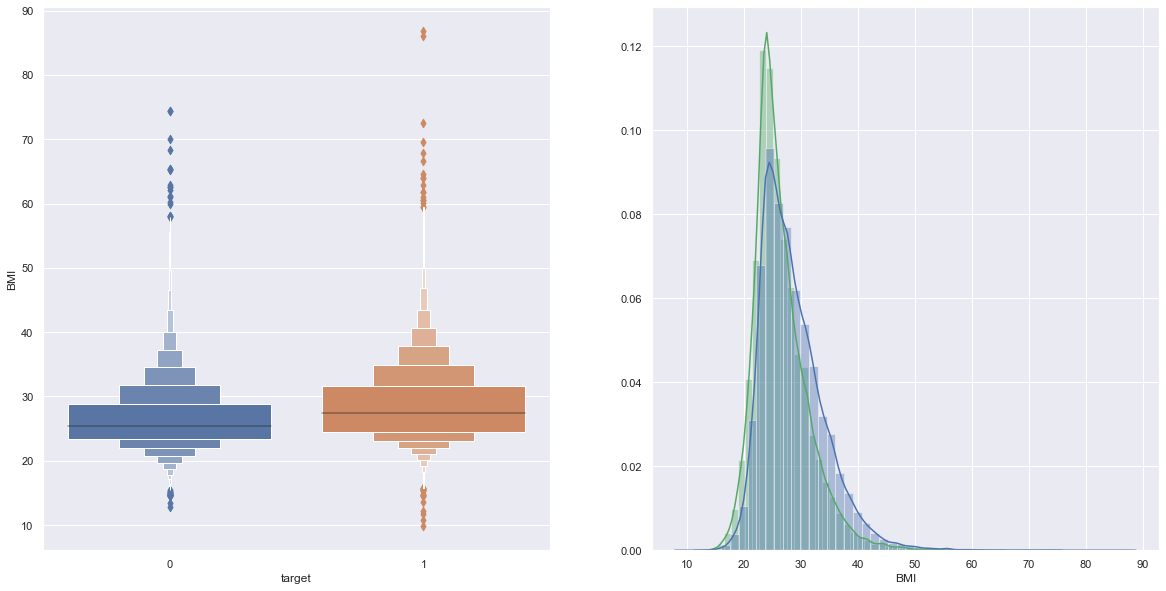

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.boxenplot(data['target'],data['BMI'],ax=ax1)
sns.distplot(data[data['target']==0]['BMI'],color='g',ax=ax2)
sns.distplot(data[data['target']==1]['BMI'],color='b',ax=ax2)
plt.show()

In [76]:
def categorize_blood_pressure(x):
  if x['systolic'] < 120 and x['diastolic'] < 80:
    return "Normal"
  elif 120 <= x['systolic'] <= 129 and x['diastolic'] < 80:
    return "Elevated"
  elif 130 <= x['systolic'] <= 139 or 80 <= x['diastolic'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['systolic'] <= 180 or 90 <= x['diastolic'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['systolic'] > 180 and  x['diastolic'] > 120) or (x['systolic'] > 180 or x['diastolic'] > 120):
    return "Hypertensive Crisis"

In [77]:
# categorizing blood pressure
data['blood_category'] = data.apply(categorize_blood_pressure, axis=1)
 
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,target,age_cat,age_tees,BMI,pulse pressure,BMI_State,smoke/alcohol,blood_category
0,50,2,5.511811,62.0,110,80,1,1,0,0,1,0,Middle Aged,50s,21.967120,30,Normal,0|0,High Blood Pressure(Stage 1)
1,55,1,5.118110,85.0,140,90,3,1,0,0,1,1,Middle Aged,60s,34.927679,50,Abnormal,0|0,High Blood Pressure(Stage 2)
2,51,1,5.413386,64.0,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,60,Normal,0|0,High Blood Pressure(Stage 1)
3,48,2,5.544620,82.0,120,100,1,1,0,0,1,1,Middle Aged,50s,28.710479,50,Abnormal,0|0,High Blood Pressure(Stage 2)
4,47,1,5.118110,56.0,100,60,1,1,0,0,0,0,Middle Aged,50s,23.011177,40,Normal,0|0,Normal


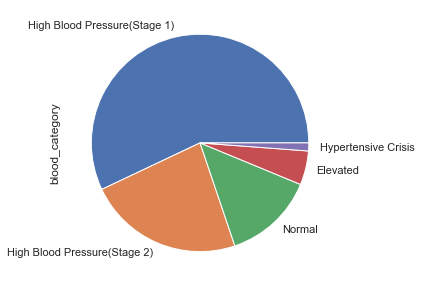

In [78]:
# Visulization of blood pressure category
data["blood_category"].value_counts().plot(kind='pie')


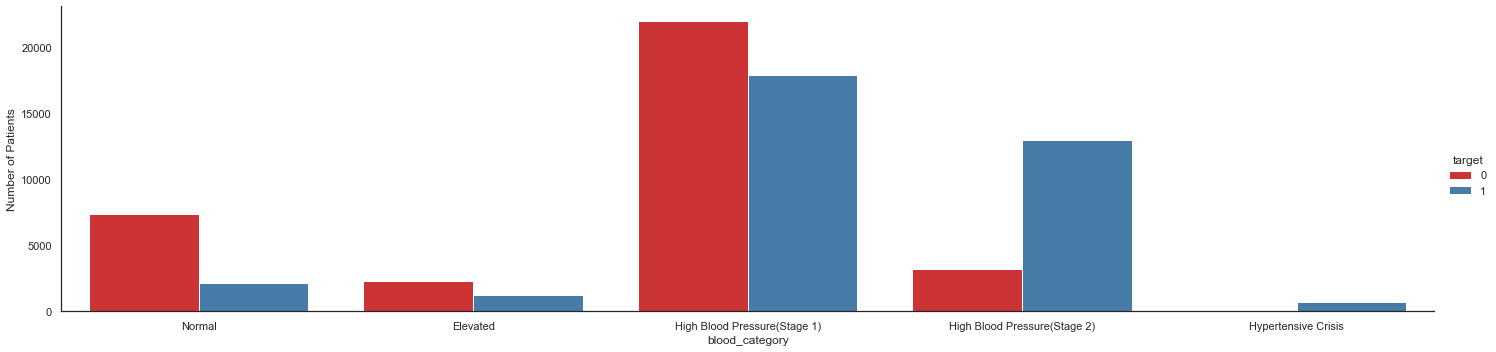

In [79]:
with sns.axes_style('white'):
    g = sns.factorplot("blood_category", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set1", order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
    g.set_ylabels('Number of Patients')

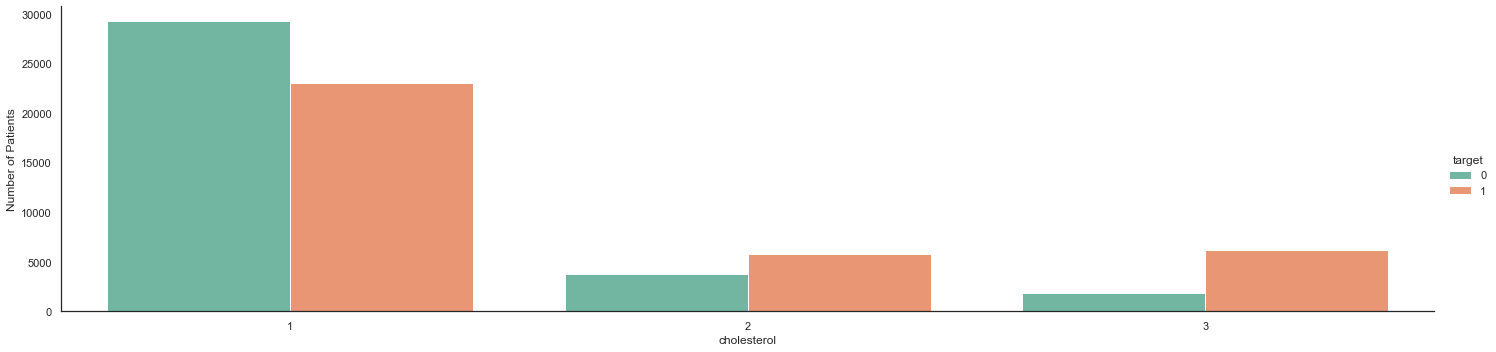

In [80]:
with sns.axes_style('white'):
    g = sns.factorplot("cholesterol", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')

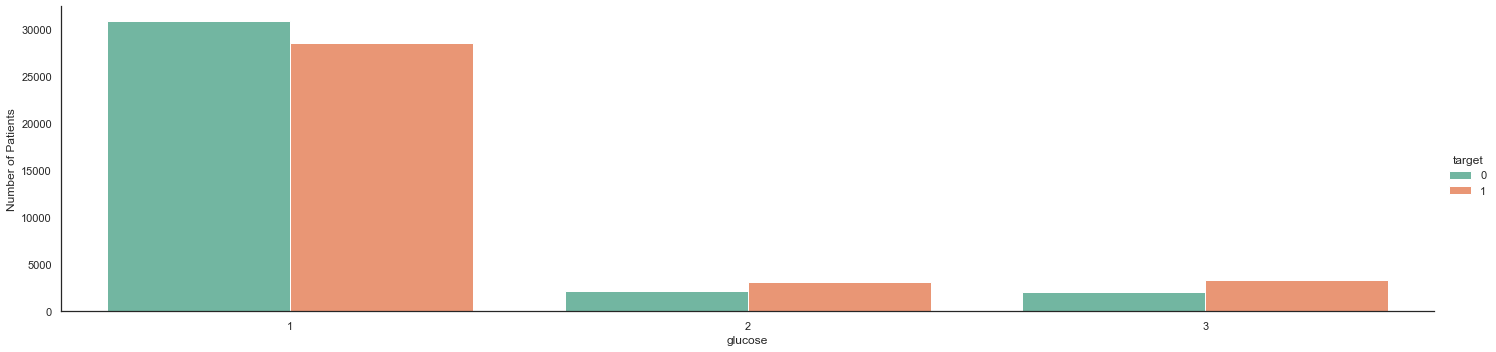

In [81]:
with sns.axes_style('white'):
    g = sns.factorplot("glucose", data=data, aspect=4.0, kind='count',
                       hue='target', palette="Set2")
    g.set_ylabels('Number of Patients')
    

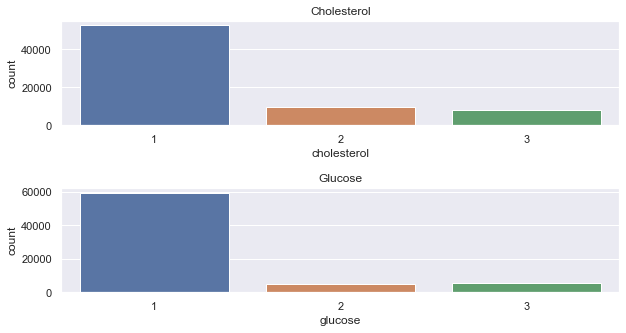

In [82]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.subplot(2,1,1)
sns.countplot('cholesterol', data= data)
plt.title('Cholesterol')

plt.subplot(2,1,2)
sns.countplot('glucose', data= data)
plt.title('Glucose')

plt.subplots_adjust(hspace= 0.6)
plt.show()

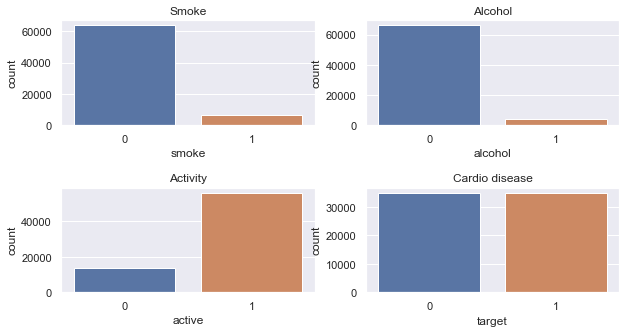

In [83]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.subplot(2,2,1)
sns.countplot('smoke', data = data)
plt.title('Smoke')

plt.subplot(2,2,2)
sns.countplot('alcohol', data = data)
plt.title('Alcohol')

plt.subplot(2,2,3)
sns.countplot('active', data = data)
plt.title('Activity')

plt.subplot(2,2,4)
sns.countplot('target', data = data)
plt.title('Cardio disease')

plt.subplots_adjust(hspace= 0.6)
plt.show()

In [84]:
# Filtering out the required features
new_data = data[["gender","age","age_tees","height","BMI","BMI_State","cholesterol","glucose","smoke","alcohol","active","blood_category","pulse pressure","target"]].copy()
new_data.head()

,gender,age,age_tees,height,BMI,BMI_State,cholesterol,glucose,smoke,alcohol,active,blood_category,pulse pressure,target
0,2,50,50s,5.511811,21.967120,Normal,1,1,0,0,1,High Blood Pressure(Stage 1),30,0
1,1,55,60s,5.118110,34.927679,Abnormal,3,1,0,0,1,High Blood Pressure(Stage 2),50,1
2,1,51,60s,5.413386,23.507805,Normal,3,1,0,0,0,High Blood Pressure(Stage 1),60,1
3,2,48,50s,5.544620,28.710479,Abnormal,1,1,0,0,1,High Blood Pressure(Stage 2),50,1
4,1,47,50s,5.118110,23.011177,Normal,1,1,0,0,0,Normal,40,0


In [85]:
# Checking any missing values
new_data.isnull().sum()

gender            0
age               0
age_tees          0
height            0
BMI               0
BMI_State         0
cholesterol       0
glucose           0
smoke             0
alcohol           0
active            0
blood_category    0
pulse pressure    0
target            0
dtype: int64

In [86]:
categorical_val = []
continous_val = []
for column in new_data.columns:
    print('==============================')
    print(f"{column} : {new_data[column].unique()}")
    if len(new_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

gender : [2 1]
age : [50 55 51 48 47 59 60 61 54 40 39 45 58 63 64 53 49 57 56 46 43 62 52 42
 41 44 29 30]
age_tees : ['50s' '60s' '70+' '40s' '20s']
height : [5.5118112 5.1181104 5.413386  5.5446196 4.9540684 5.1509188 5.8398952
 5.1837272 5.3805776 5.6758532 5.9383204 5.6430448 5.577428  5.0524936
 5.3149608 5.3477692 5.0196852 5.2165356 5.4461944 5.085302  5.249344
 5.74147   5.6102364 4.9868768 6.1351708 4.8556432 5.8727036 5.905512
 6.1679792 6.069554  5.4790028 6.0039372 5.7086616 5.7742784 5.2821524
 6.0367456 5.8070868 5.9711288 4.8884516 4.6587928 4.92126   4.7244096
 4.8228348 4.7900264 4.6259844 6.397638  4.593176  6.4960632 6.1023624
 4.757218  4.6916012 6.4304464 4.5275592 6.3648296 6.233596  4.3963256
 4.4619424 3.28084   3.937008  6.2007876 4.4947508 6.2992128 6.2664044
 3.8385828 3.9041996 4.265092  3.608924  6.3320212 4.3307088 4.429134
 4.5603676 4.3635172 3.2152232 6.7913388 3.5761156 4.10105   6.4632548
 4.1994752 3.444882  3.5433072 6.56168   3.6417324 3.7073492 3

In [87]:
categorical_val

['gender',
 'age_tees',
 'BMI_State',
 'cholesterol',
 'glucose',
 'smoke',
 'alcohol',
 'active',
 'blood_category',
 'target']

In [88]:
# Label encode the categorical columns BMI_State & blood category
le = preprocessing.LabelEncoder()

# BMI_State
le.fit(new_data['BMI_State'])
new_data['BMI_State'] = le.transform(new_data['BMI_State'])

# blood category
le.fit(new_data['blood_category'])
new_data['blood_category'] = le.transform(new_data['blood_category'])

# age tees
le.fit(new_data['age_tees'])
new_data['age_tees'] = le.transform(new_data['age_tees'])

new_data.head()

,gender,age,age_tees,height,BMI,BMI_State,cholesterol,glucose,smoke,alcohol,active,blood_category,pulse pressure,target
0,2,50,2,5.511811,21.967120,1,1,1,0,0,1,1,30,0
1,1,55,3,5.118110,34.927679,0,3,1,0,0,1,2,50,1
2,1,51,3,5.413386,23.507805,1,3,1,0,0,0,1,60,1
3,2,48,2,5.544620,28.710479,0,1,1,0,0,1,2,50,1
4,1,47,2,5.118110,23.011177,1,1,1,0,0,0,4,40,0


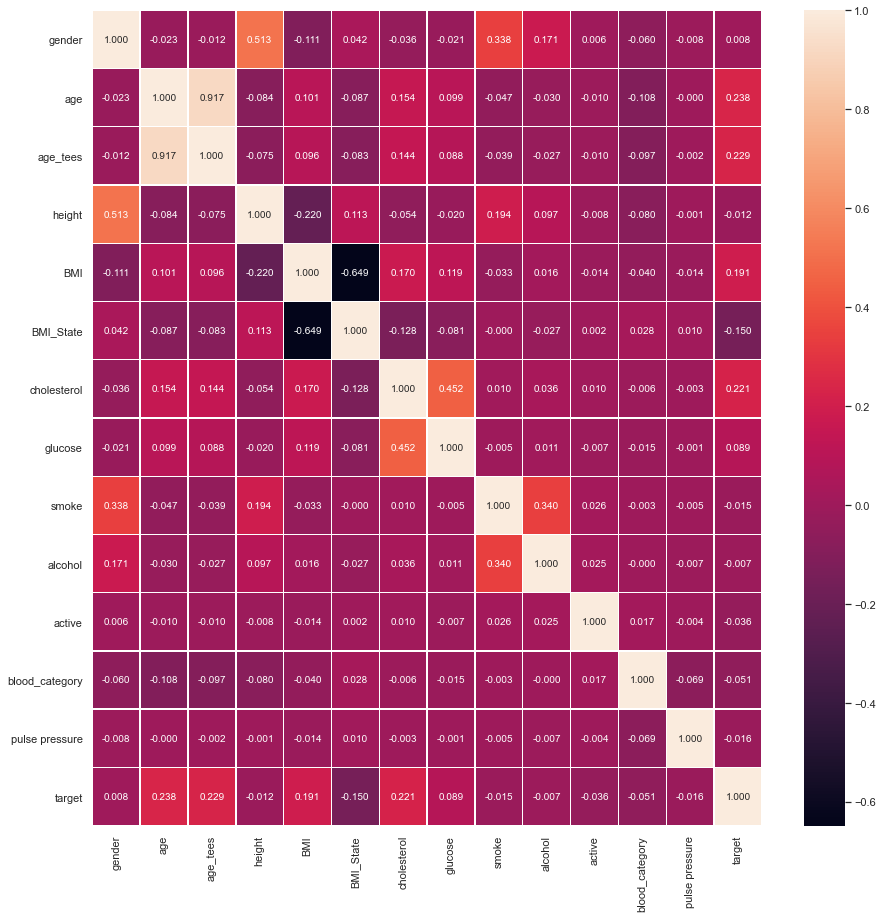

In [89]:
# plotting correlation map
corr = new_data.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.4, ax=ax)


In [90]:
new_data.head(5)

,gender,age,age_tees,height,BMI,BMI_State,cholesterol,glucose,smoke,alcohol,active,blood_category,pulse pressure,target
0,2,50,2,5.511811,21.967120,1,1,1,0,0,1,1,30,0
1,1,55,3,5.118110,34.927679,0,3,1,0,0,1,2,50,1
2,1,51,3,5.413386,23.507805,1,3,1,0,0,0,1,60,1
3,2,48,2,5.544620,28.710479,0,1,1,0,0,1,2,50,1
4,1,47,2,5.118110,23.011177,1,1,1,0,0,0,4,40,0


In [91]:
new_data.shape


(69927, 14)

In [92]:
categorical_val.remove('target')
new_data = pd.get_dummies(new_data, columns = categorical_val)


In [93]:
new_data.head()

,age,height,BMI,pulse pressure,target,gender_1,gender_2,age_tees_0,age_tees_1,age_tees_2,...,smoke_1,alcohol_0,alcohol_1,active_0,active_1,blood_category_0,blood_category_1,blood_category_2,blood_category_3,blood_category_4
0,50,5.511811,21.967120,30,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,55,5.118110,34.927679,50,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,51,5.413386,23.507805,60,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,48,5.544620,28.710479,50,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,47,5.118110,23.011177,40,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [94]:
print(data.columns)
print(new_data.columns)

Index(['age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'target',
       'age_cat', 'age_tees', 'BMI', 'pulse pressure', 'BMI_State',
       'smoke/alcohol', 'blood_category'],
      dtype='object')
Index(['age', 'height', 'BMI', 'pulse pressure', 'target', 'gender_1',
       'gender_2', 'age_tees_0', 'age_tees_1', 'age_tees_2', 'age_tees_3',
       'age_tees_4', 'BMI_State_0', 'BMI_State_1', 'cholesterol_1',
       'cholesterol_2', 'cholesterol_3', 'glucose_1', 'glucose_2', 'glucose_3',
       'smoke_0', 'smoke_1', 'alcohol_0', 'alcohol_1', 'active_0', 'active_1',
       'blood_category_0', 'blood_category_1', 'blood_category_2',
       'blood_category_3', 'blood_category_4'],
      dtype='object')


In [95]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'pulse pressure', 'height', 'BMI']
new_data[col_to_scale] = s_sc.fit_transform(new_data[col_to_scale])

In [96]:
new_data.head()

,age,height,BMI,pulse pressure,target,gender_1,gender_2,age_tees_0,age_tees_1,age_tees_2,...,smoke_1,alcohol_0,alcohol_1,active_0,active_1,blood_category_0,blood_category_1,blood_category_2,blood_category_3,blood_category_4
0,-0.414628,0.451404,-1.045661,-0.009118,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,0.324717,-1.050998,1.406094,0.073685,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-0.266759,0.075804,-0.754209,0.115086,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,-0.710366,0.576604,0.229984,0.073685,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,-0.858235,-1.050998,-0.848156,0.032283,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,auc,roc_auc_score,roc_curve

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        

In [98]:
from sklearn.model_selection import train_test_split

X = new_data.drop('target', axis=1)
y = new_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                                                    

In [99]:
X_train.head(10)

,age,height,BMI,pulse pressure,gender_1,gender_2,age_tees_0,age_tees_1,age_tees_2,age_tees_3,...,smoke_1,alcohol_0,alcohol_1,active_0,active_1,blood_category_0,blood_category_1,blood_category_2,blood_category_3,blood_category_4
15515,1.655537,0.701805,0.362646,0.115086,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
15048,0.324717,0.326204,1.310468,0.156487,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
36205,1.064061,-1.050998,-1.159088,0.032283,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
65105,-0.562497,0.576604,-0.498589,0.073685,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
5415,-0.118890,-0.800598,-0.124112,-0.009118,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
63284,-0.118890,0.326204,1.039149,-0.009118,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
8450,0.620454,0.075804,0.635473,0.115086,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
40560,1.507668,-0.049396,1.832214,0.032283,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1359,1.211930,-0.049396,0.917872,0.073685,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
42501,0.176848,0.451404,-0.107315,0.115086,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [100]:
X_test.head(10)

,age,height,BMI,pulse pressure,gender_1,gender_2,age_tees_0,age_tees_1,age_tees_2,age_tees_3,...,smoke_1,alcohol_0,alcohol_1,active_0,active_1,blood_category_0,blood_category_1,blood_category_2,blood_category_3,blood_category_4
13992,-0.562497,0.576604,0.494919,0.115086,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
29704,0.176848,0.451404,-0.643513,0.073685,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
25194,0.324717,0.952205,3.750900,0.115086,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
26298,-0.118890,-1.551799,1.021522,0.032283,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
36952,-0.858235,1.703406,-1.380048,0.073685,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
54281,0.176848,0.326204,0.835659,0.032283,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
34365,-1.449710,1.953806,0.287088,0.073685,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
27874,0.324717,0.326204,-0.113958,0.032283,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
33215,0.620454,-0.174597,-0.217213,0.032283,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
11316,0.028979,1.953806,-0.763859,0.032283,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48948 entries, 15515 to 15810
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               48948 non-null  float64
 1   height            48948 non-null  float64
 2   BMI               48948 non-null  float64
 3   pulse pressure    48948 non-null  float64
 4   gender_1          48948 non-null  uint8  
 5   gender_2          48948 non-null  uint8  
 6   age_tees_0        48948 non-null  uint8  
 7   age_tees_1        48948 non-null  uint8  
 8   age_tees_2        48948 non-null  uint8  
 9   age_tees_3        48948 non-null  uint8  
 10  age_tees_4        48948 non-null  uint8  
 11  BMI_State_0       48948 non-null  uint8  
 12  BMI_State_1       48948 non-null  uint8  
 13  cholesterol_1     48948 non-null  uint8  
 14  cholesterol_2     48948 non-null  uint8  
 15  cholesterol_3     48948 non-null  uint8  
 16  glucose_1         48948 non-null  ui

In [102]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20979 entries, 13992 to 35941
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20979 non-null  float64
 1   height            20979 non-null  float64
 2   BMI               20979 non-null  float64
 3   pulse pressure    20979 non-null  float64
 4   gender_1          20979 non-null  uint8  
 5   gender_2          20979 non-null  uint8  
 6   age_tees_0        20979 non-null  uint8  
 7   age_tees_1        20979 non-null  uint8  
 8   age_tees_2        20979 non-null  uint8  
 9   age_tees_3        20979 non-null  uint8  
 10  age_tees_4        20979 non-null  uint8  
 11  BMI_State_0       20979 non-null  uint8  
 12  BMI_State_1       20979 non-null  uint8  
 13  cholesterol_1     20979 non-null  uint8  
 14  cholesterol_2     20979 non-null  uint8  
 15  cholesterol_3     20979 non-null  uint8  
 16  glucose_1         20979 non-null  ui

In [103]:
#%% split training set to validation set
#Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.3)
                                              

In [104]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 70.50%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.680450      0.737908  0.705034      0.709179      0.709095
recall         0.776370      0.633283  0.705034      0.704826      0.705034
f1-score       0.725252      0.681604  0.705034      0.703428      0.703491
support    24545.000000  24403.000000  0.705034  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19056  5489]
 [ 8949 15454]]



In [105]:
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score]], columns=['Algorithm', 'Training Accuracy %'])
results_df


,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391


In [106]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 71.03%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.684634      0.744815  0.710305      0.714725      0.714638
recall         0.782929      0.637258  0.710305      0.710094      0.710305
f1-score       0.730490      0.686851  0.710305      0.708671      0.708734
support    24545.000000  24403.000000  0.710305  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19217  5328]
 [ 8852 15551]]



In [107]:
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 97.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.971074      0.988603  0.979652      0.979838      0.979813
recall         0.988878      0.970372  0.979652      0.979625      0.979652
f1-score       0.979895      0.979403  0.979652      0.979649      0.979650
support    24545.000000  24403.000000  0.979652  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[24272   273]
 [  723 23680]]



In [109]:
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481
2,Random Forest Classifier,97.965188


In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 76.89%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.765338      0.772636  0.768918      0.768987      0.768977
recall         0.777592      0.760193  0.768918      0.768893      0.768918
f1-score       0.771416      0.766364  0.768918      0.768890      0.768898
support    24545.000000  24403.000000  0.768918  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19086  5459]
 [ 5852 18551]]



In [111]:
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score]], columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481
2,Random Forest Classifier,97.965188
3,K-nearest neighbors,76.891804


In [112]:
# Gaussian Naive Bayes

gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
print_score(gaussian_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 61.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.777224      0.571414  0.614428      0.674319      0.674617
recall         0.323936      0.906610  0.614428      0.615273      0.614428
f1-score       0.457283      0.701003  0.614428      0.579143      0.578789
support    24545.000000  24403.000000  0.614428  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[ 7951 16594]
 [ 2279 22124]]



In [113]:
train_score = accuracy_score(y_train, gaussian_clf.predict(X_train)) * 100
results_df_2 = pd.DataFrame(data=[["Gaussian naive bayes", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481
2,Random Forest Classifier,97.965188
3,K-nearest neighbors,76.891804
4,Gaussian naive bayes,61.442756


In [114]:
percept_clf = Perceptron()
percept_clf.fit(X_train, y_train)
print_score(percept_clf, X_train, y_train, X_test, y_test, train=True)


Train Result:
Accuracy Score: 52.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.515352      0.746062  0.527621      0.630707      0.630373
recall         0.973070      0.079580  0.527621      0.526325      0.527621
f1-score       0.673833      0.143820  0.527621      0.408826      0.409595
support    24545.000000  24403.000000  0.527621  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[23884   661]
 [22461  1942]]



In [115]:
train_score = accuracy_score(y_train, percept_clf.predict(X_train)) * 100
results_df_2 = pd.DataFrame(data=[["Perceptron", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481
2,Random Forest Classifier,97.965188
3,K-nearest neighbors,76.891804
4,Gaussian naive bayes,61.442756
5,Perceptron,52.762115


In [116]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 97.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.964129      0.996353  0.979652      0.980241      0.980194
recall         0.996496      0.962710  0.979652      0.979603      0.979652
f1-score       0.980046      0.979242  0.979652      0.979644      0.979645
support    24545.000000  24403.000000  0.979652  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[24459    86]
 [  910 23493]]



In [117]:
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481
2,Random Forest Classifier,97.965188
3,K-nearest neighbors,76.891804
4,Gaussian naive bayes,61.442756
5,Perceptron,52.762115
6,Decision Tree Classifier,97.965188


In [118]:
#stochastic gradient descent

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)


print_score(sgd_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 69.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.663099      0.748232  0.696556      0.705666      0.705542
recall         0.802689      0.589805  0.696556      0.696247      0.696556
f1-score       0.726247      0.659639  0.696556      0.692943      0.693040
support    24545.000000  24403.000000  0.696556  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19702  4843]
 [10010 14393]]



In [119]:
train_score = accuracy_score(y_train, sgd_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Stochastic gradient descent", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Algorithm,Training Accuracy %
0,Logistic Regression,70.503391
1,Support Vector Machine,71.030481
2,Random Forest Classifier,97.965188
3,K-nearest neighbors,76.891804
4,Gaussian naive bayes,61.442756
5,Perceptron,52.762115
6,Decision Tree Classifier,97.965188
7,Stochastic gradient descent,69.655553


In [120]:
# Predicted values
y_head_lr = lr_clf.predict(X_train)
y_head_svm = svm_clf.predict(X_train)
y_head_rf = rf_clf.predict(X_train)
y_head_knn = knn_clf.predict(X_train)
y_head_gaussian = gaussian_clf.predict(X_train)
y_head_percept = percept_clf.predict(X_train)
y_head_dtc = tree_clf.predict(X_train)
y_head_sgd = sgd_clf.predict(X_train)


In [121]:
cm_lr = confusion_matrix(y_train,y_head_lr)
cm_svm = confusion_matrix(y_train,y_head_svm)
cm_rf = confusion_matrix(y_train,y_head_rf)
cm_knn = confusion_matrix(y_train,y_head_knn)
cm_gaussian = confusion_matrix(y_train,y_head_gaussian)
cm_percept = confusion_matrix(y_train,y_head_percept)
cm_dtc = confusion_matrix(y_train,y_head_dtc)
cm_sgd = confusion_matrix(y_train,y_head_sgd)



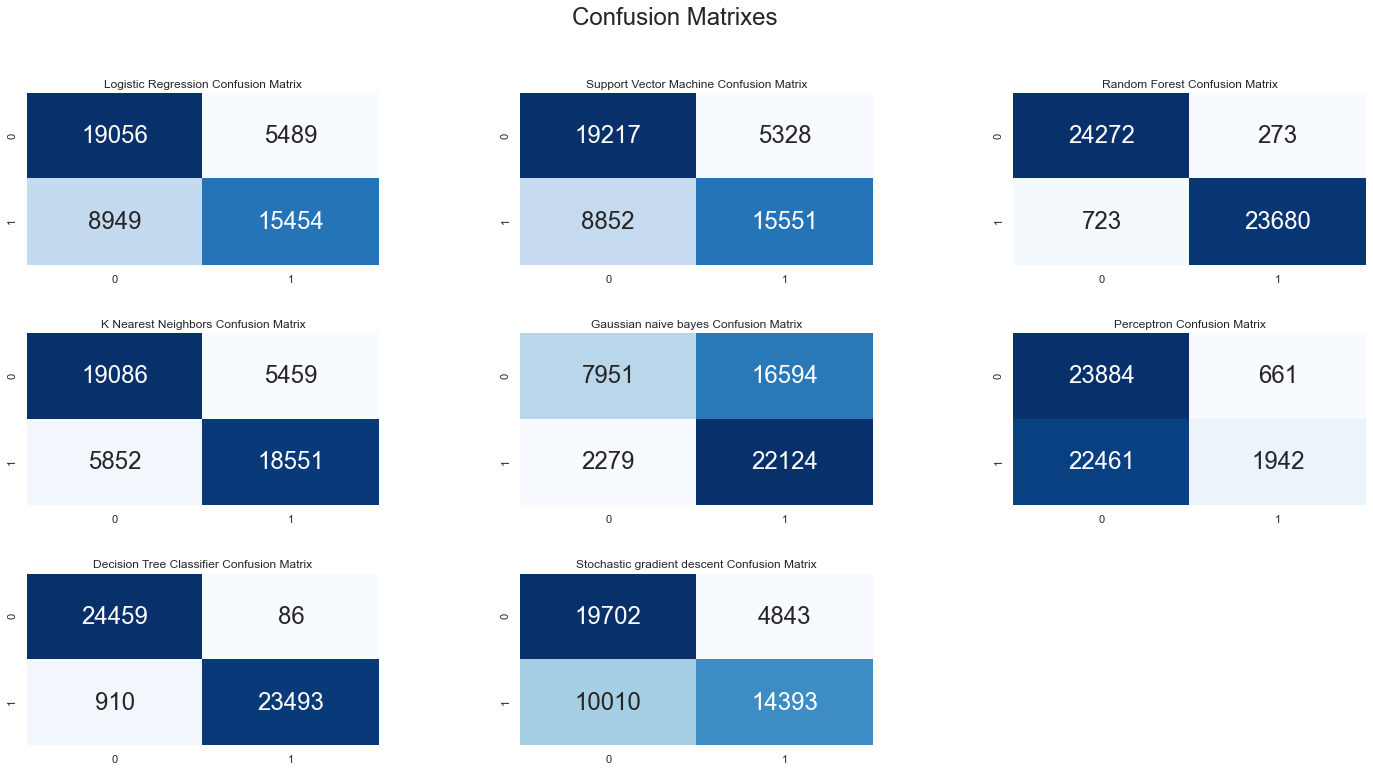

In [122]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Gaussian naive bayes Confusion Matrix")
sns.heatmap(cm_gaussian,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Perceptron Confusion Matrix")
sns.heatmap(cm_percept,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.subplot(3,3,7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Stochastic gradient descent Confusion Matrix")
sns.heatmap(cm_sgd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.7s finished


Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 70.49%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.680541      0.737251   0.70485      0.708896      0.708814
recall         0.775392      0.633897   0.70485      0.704645      0.704850
f1-score       0.724877      0.681679   0.70485      0.703278      0.703340
support    24545.000000  24403.000000   0.70485  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[19032  5513]
 [ 8934 15469]]



In [125]:
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
tuning_results_df

,Algorithm,Training Accuracy %
0,Tuned Logistic Regression,70.485004


In [126]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 71.90%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.708049      0.731265  0.718967      0.719657      0.719624
recall         0.747973      0.689792  0.718967      0.718883      0.718967
f1-score       0.727464      0.709924  0.718967      0.718694      0.718719
support    24545.000000  24403.000000  0.718967  48948.000000  48948.000000
_______________________________________________
Confusion Matrix: 
 [[18359  6186]
 [ 7570 16833]]



In [127]:
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score]], 
                          columns=['Algorithm', 'Training Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Algorithm,Training Accuracy %
0,Tuned Logistic Regression,70.485004
1,Tuned K-nearest neighbors,71.896707


In [128]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf_clf, X = X_train, y = y_train, cv=10)
print("Cross validation accuracy of Random forest model = ", cross_validation)
print("\nCross validaion mean accuracy of Random forest model = ", cross_validation.mean())

Cross validation accuracy of Random forest model =  [0.68702758 0.69703779 0.69458631 0.69540347 0.69908069 0.70051073
 0.71052094 0.69826353 0.69758888 0.70269718]

Cross validaion mean accuracy of Random forest model =  0.6982717116662833
